# Descrição da Tarefa

## Sprint 2:

Desafio 01 - 1/2:

O desafio será dividido em 2 partes, a continuação do mesmo ficará para a próxima Sprint.
Dado uma base de dados DataBase retirada do link Iris Species e pensando em um
problema de classificação. 

Efetuar os seguintes passos:
1. Exploração e Análise dos dados.
2. Gerar Insight das análises.
3. Preparar os dados para modelos de Aprendizado de Máquina.

#  Importando DataSet

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))

# Exploração e Análise dos dados

## Descrição do Data Set

In [5]:
df.shape

(150, 6)

150 observações. 6 variáveis

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Obtendo as Keys/colunas do nosso dataframe

df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Tipos de dados das colunas/variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Não possui valores nulos;

Id possui valores inteiros;

Species são do tipo *object*;

As demais variáveis são floats.





##Entendendo do que se trata as informações do banco de dados

A coluna **IDs** de contas são a **identificação das observações**.

A coluna **Species** parece ser a variável de resposta/*target*.

As demais parecem ser as *feature* características:

* **SepalLengthCm** -> Comprimento da Sépala em cm;
* **SepalWidthCm**  -> Largura da Sépala em cm;
* **PetalLenghtCm** -> Comprimento da Pétala em cm;
* **PetalWidthCm** -> Largura da Pétala em cm;


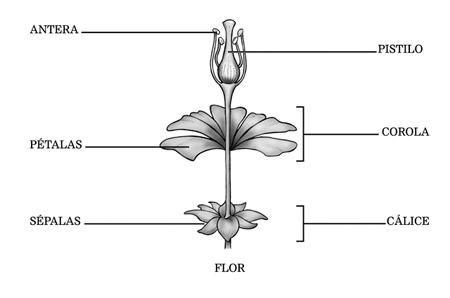

Figura 1 - Sépala x Pétala

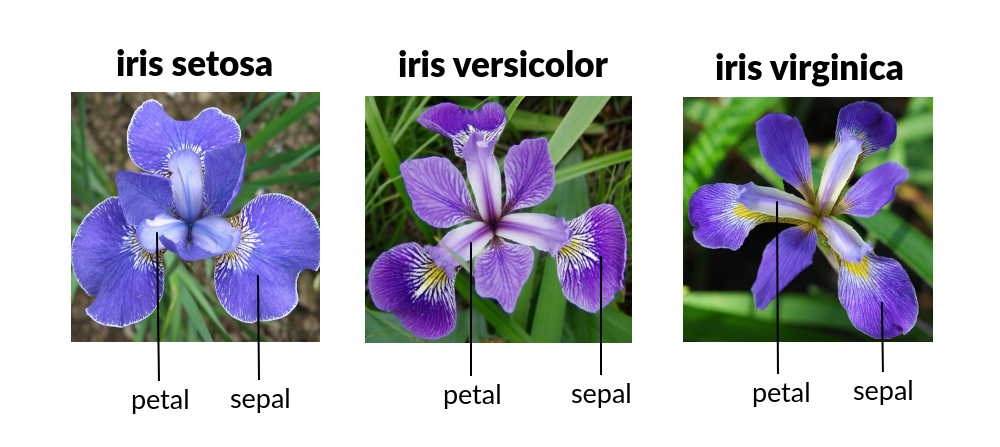

## Verificando a qualidade dos dados

In [9]:
# A função pandas .nunique() retorna o número de elementos únicos no objeto.

df['Id'].nunique()

150

Comparando o número de observações obtido anteriormente (.shape) com o obtido na função acima vemos que o Id é um número exclusivo.

In [10]:
# Entendendo as variáveis.
# A função pandas .nunique() retornará o número de elementos únicos no objeto.

df['Species'].nunique()

3

Vemos que a variável **Specie** contém apenas 3 valores. Então, provável que está variável seja o *Label*

In [11]:
# armazene as contagens de valores em uma variável definida como species_counts 
# e exiba os valores armazenados usando o método .head()

species_counts = df['Species'].value_counts()

In [12]:
# Distribuição das Species

species_counts.head()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Existem 50 observações para cada **Species**. Sendo 3 espécies, então temos 150 espécies classificadas. 



## Resumo Estatístico

In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



## Outliers

Vamos fazer um *boxplot* para analisar os possiveis outliers.

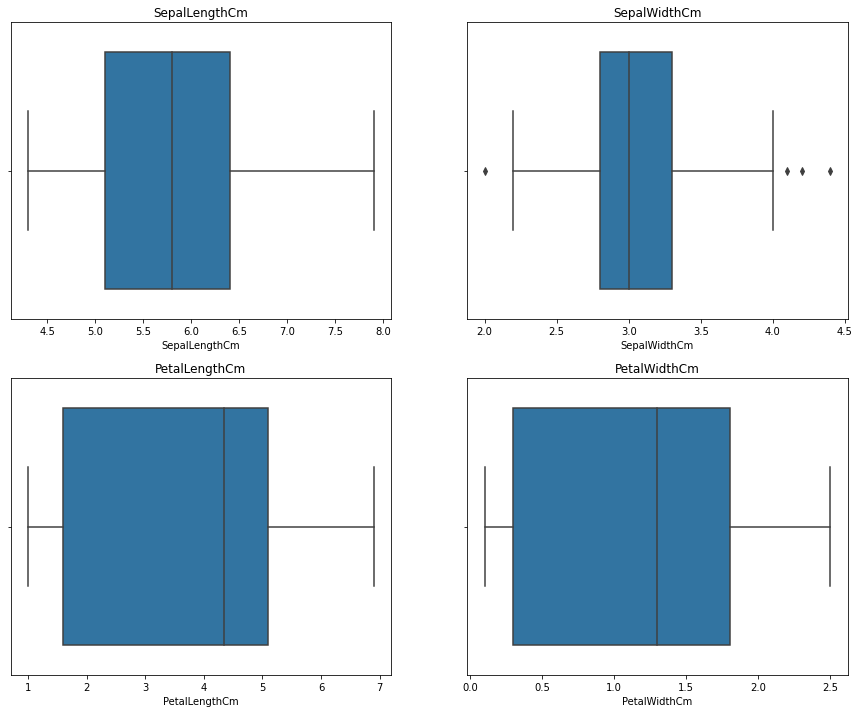

In [14]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['SepalLengthCm'])
plt.title("SepalLengthCm")

plt.subplot(2,2,2)
sns.boxplot(x=df['SepalWidthCm'])
plt.title("SepalWidthCm")


plt.subplot(2,2,3)
sns.boxplot(x=df['PetalLengthCm'])
plt.title("PetalLengthCm")


plt.subplot(2,2,4)
sns.boxplot(x=df['PetalWidthCm'])
plt.title("PetalWidthCm");

Podemos observar que o 'SepalWidthCm' possui algums possiveis outliers. Mas devido a pouca quantidade de dados é muito arriscado treinar os modelos sem essas instâncias.

## Visualização dos dados

Confirmando a quantidade de cada espécie

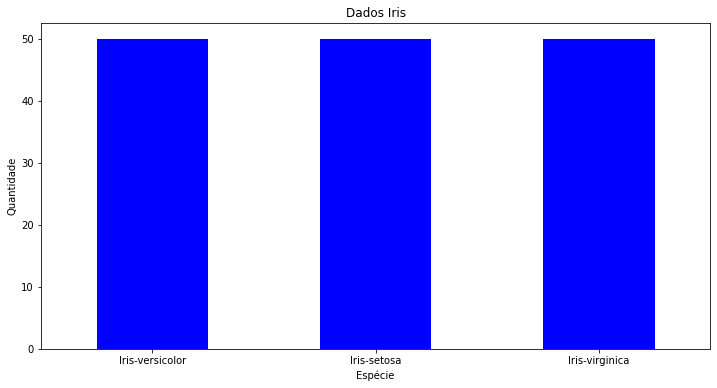

In [15]:
# Visualizando a distribuição das Species num gráfico de barras

df['Species'].value_counts().head(10).plot(kind='bar', 
                                           figsize=(12,6),
                                           grid = False, 
                                           rot=0, 
                                           color="blue")

# Ajustando descrições
plt.title('Dados Iris')
plt.xlabel('Espécie')
plt.ylabel('Quantidade')
plt.show()

Visualizando como as medidas estão distribuídas com um histograma

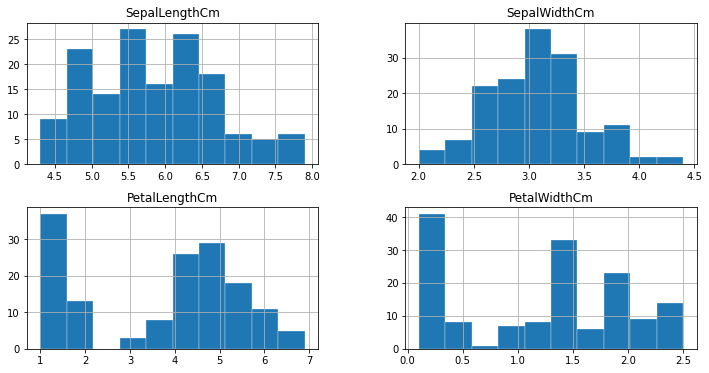

In [16]:
# separando apenas as features
df2 = df[["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"]]


df2.hist(figsize=(12,6), edgecolor = 'white', linewidth=0.3)
plt.show()

Com este histograma da distribuição da quantidades de cada variável, pode-se perceber que pela escala que as Sépalas são normalmente maiores que as Pétalas

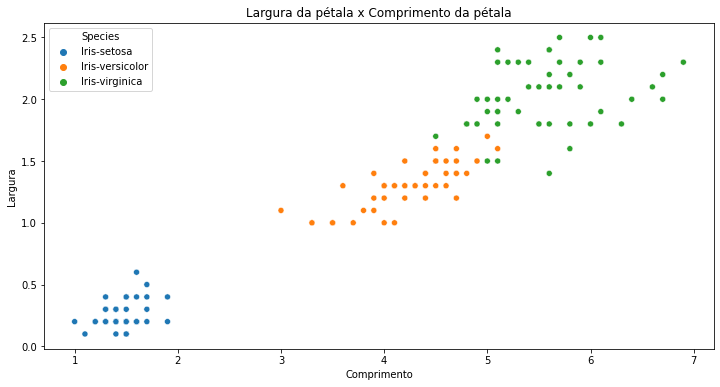

In [17]:
# Gráfico de dispersão largura vs comprimento das pétalas

plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')
plt.title('Largura da pétala x Comprimento da pétala')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.show()

Percebe-se que as pétalas da espécie Virginica são predominantemente a maiores do que as outras duas. A Setosa é predominantemente menor.


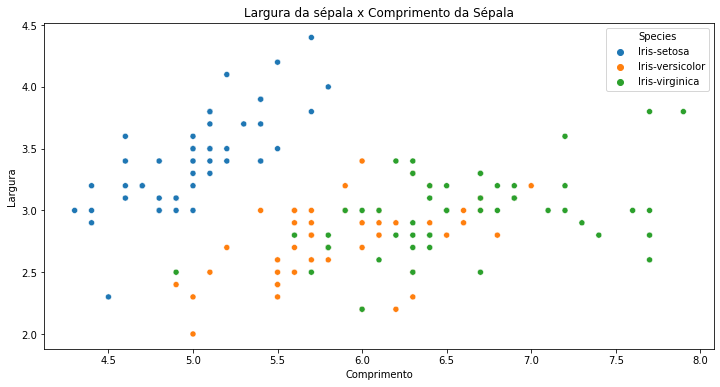

In [18]:
# Gráfico de dispersão largura vs comprimento das Sépalas

plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')
plt.title('Largura da sépala x Comprimento da Sépala')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.show()

Quando comparamos a Sépala, a Setosa tem maior comprimentor, enquanto a Virginica apresenta as maiores larguras.

Observa-se que as Sepalas possuem tamanhos mais dispersos.

observa-se que as petalas possuem tamanhos com crescimento linear

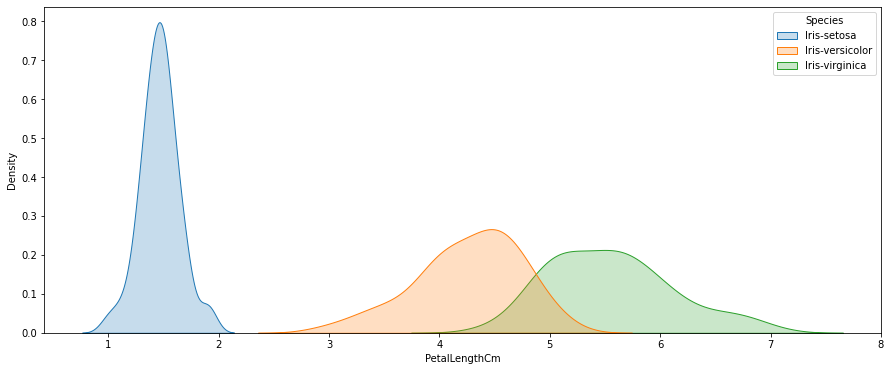

In [ ]:
# Visualizando a densidade de cada tipo: Isis-setosa, Isis-Versicolor e Isis-Virginica 
# para o comprimento das Petalas

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='PetalLengthCm', hue='Species',shade=True, color='b')

Observa-se que as do tipo setosa possuem petalas com comprimento em um intervalo de 1 a 2, sendo bem distintas das demais. 
Já as versicolor e virginica possuem valores proximos para a densidade, entre 0 e 0.3. 

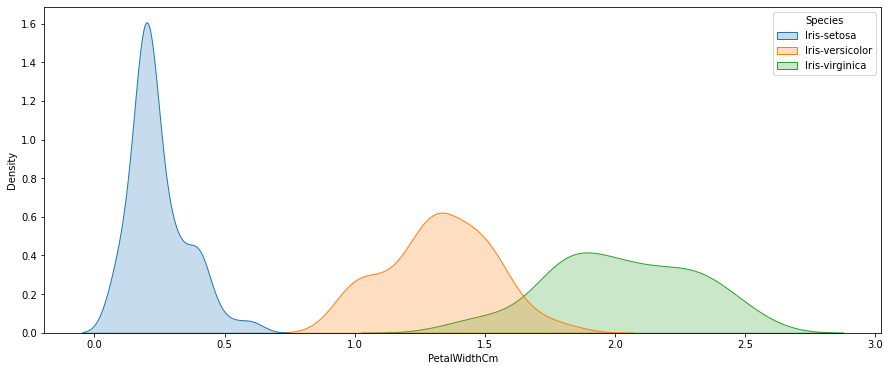

In [ ]:
# Visualizando a densidade de cada tipo: Isis-setosa, Isis-Versicolor e Isis-Virginica 
# para a largura das Petalas

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='PetalWidthCm', hue='Species',shade=True, color='b')

Observa-se que novamente as do tipo setosa são menores e não possuem valores no mesmo intervalo que as versicolor e virginica.
Ainda, as do tipo versicolor e virginica possuem densidade relativamente no mesmo intervalo de 0 a 0.6

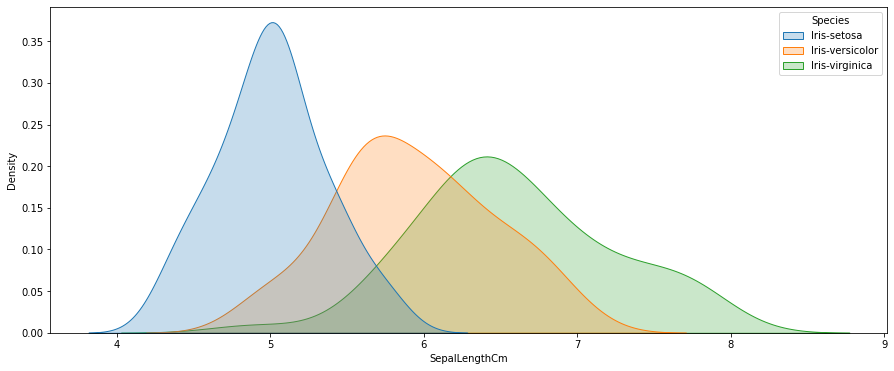

In [ ]:
#Visualizando a densidade de cada tipo: Isis-setosa, Isis-Versicolor e Isis-Virginica para o comprimento das Sepalas
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='SepalLengthCm', hue='Species',shade=True, color='b')

Observa-se que para as sepalas os tres tipo possuem interseção de valores para o comprimento. Ainda, o tipo setosa possui maiores valores para densidade e as do tipo versicolor e virginica possuem valores bem proximos. 

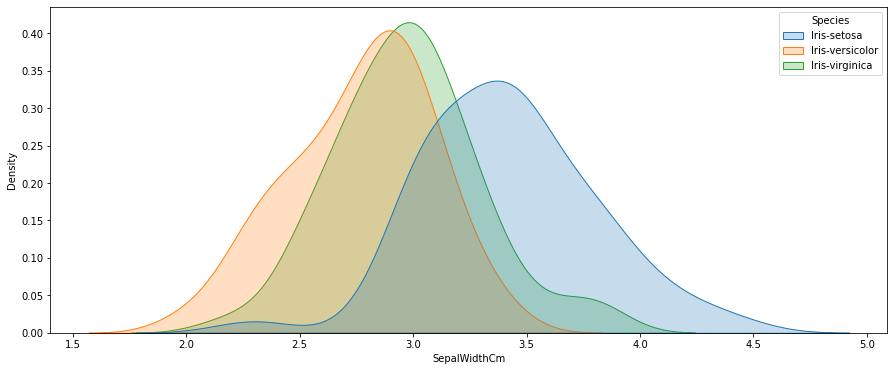

In [ ]:
#Visualizando a densidade de cada tipo: Isis-setosa, Isis-Versicolor e Isis-Virginica para a largura das Sepalas
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='SepalWidthCm', hue='Species',shade=True, color='b')

Observa-se que os valores de largura para as sepalas são bastante parecidos. 

Com a analise dos graficos anteriores nos podemos tirar as seguintes conclusões:

Sepal:

- A "Iris-setosa" possui o menor comprimento, mas a maior largura.
- A "Iris-versicolor" possui um tamanho medio, só que mais proximo da "Iris-virginica"
- A "Iris-virginica" possui o maior comprimento.

Petal:

- A "Iris-setosa" parece ser a menor de todas as *species*
- A "Iris-versicolor" possui um tamanho medio, só que mais proximo da "Iris-virginica"
- A "Iris-virginica" parece possuir o maior tamanho.

Com base nisso, pode ser interessante criar colunas com a area da "Sepal" e da "Petal".

## Áreas 

Primeiro vamos aplicar o LabelEncoder na variavel especie para analisar depois a correlação.

In [ ]:
from sklearn import preprocessing
df_analise = df.copy() #Criar uma copia para não editar o original

label_encoder = preprocessing.LabelEncoder()

df_analise['Species'] = label_encoder.fit_transform(df_analise['Species'])

sp = label_encoder.classes_

In [ ]:
df_analise["SepalAreaCm"] = df_analise['SepalLengthCm']*df_analise['SepalWidthCm']
df_analise["PetalAreaCm"] = df_analise['PetalLengthCm']*df_analise['PetalWidthCm']
df_analise.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreaCm,PetalAreaCm
0,1,5.1,3.5,1.4,0.2,0,17.85,0.28
1,2,4.9,3.0,1.4,0.2,0,14.70,0.28
2,3,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5,5.0,3.6,1.4,0.2,0,18.00,0.28


Vamos plotar a area para ver se conseguimos tirar alguma informação.

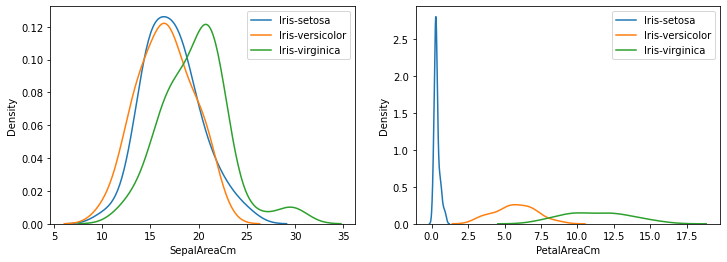

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.kdeplot(df_analise.loc[df_analise.Species == 0]['SepalAreaCm'], label='{}'.format(sp[0]))
sns.kdeplot(df_analise.loc[df_analise.Species == 1]['SepalAreaCm'], label='{}'.format(sp[1]))
sns.kdeplot(df_analise.loc[df_analise.Species == 2]['SepalAreaCm'], label='{}'.format(sp[2]))
plt.legend();

plt.subplot(1,2,2)
sns.kdeplot(df_analise.loc[df_analise.Species == 0]['PetalAreaCm'], label='{}'.format(sp[0]))
sns.kdeplot(df_analise.loc[df_analise.Species == 1]['PetalAreaCm'], label='{}'.format(sp[1]))
sns.kdeplot(df_analise.loc[df_analise.Species == 2]['PetalAreaCm'], label='{}'.format(sp[2]))
plt.legend();

## Correlação

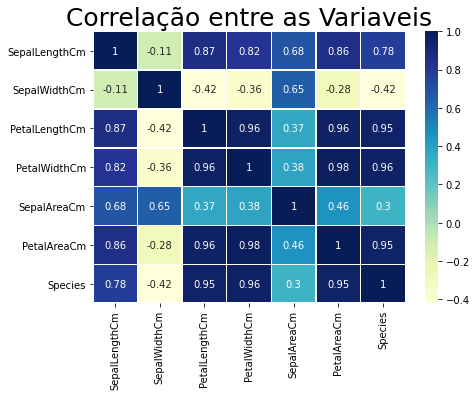

In [ ]:
atributos = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "SepalAreaCm", 'PetalAreaCm',"Species"]

plt.rcParams['figure.figsize'] = (7, 5) 
sns.heatmap(df_analise[atributos].corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlação entre as Variaveis', fontsize = 25)
plt.show()

A analise da matriz de correlação indica que a maioria das variaveis tem uma alta correlação entre si (quanto mais escuro as celulas da matriz mais alta a correlação.). 

- É importante observar isso com cuidado pois a alta correlação entre duas variaveis de entrada pode indicar que ambas estão representando o mesmo fenomeno.

Quanto maior o comprimento da sépala, menor a largura e maior o comprimento e largura da pétala

Quanto maior o comprimento da pétala maior a largura, maior o comprimento da pétala e menor a largura da pétala.




Por último vamos analisar a correlação das novas variaveis em relação a de saida.

In [ ]:
atributos = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SepalAreaCm', 'PetalAreaCm', 'Species']
corr_m = df_analise[atributos].corr().abs()
corr_m["Species"].sort_values(ascending=False)

Species          1.000000
PetalWidthCm     0.956464
PetalAreaCm      0.950142
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm     0.419446
SepalAreaCm      0.301045
Name: Species, dtype: float64

- Podemos ver que as colunas criadas possuem uma correlação com a variavel resposta menor que as originais. Portanto, pode não ser interessante utilizar elas.
- Outra coisa que fica mais facil de notar aqui também é o modulo de correlação das variaveis de entrada com a variavel de saida (Species). Temos duas variaveis com correlação acima de 0.94. Isso pode indicar que temos boas variaveis para representar o fenomeno, e que um modelo linear pode ser uma opção.

## Distribuição dos dados

Vamos plotar a distribuição dos dados, pois isso é importante para escolhermos a transformação de escala correta.

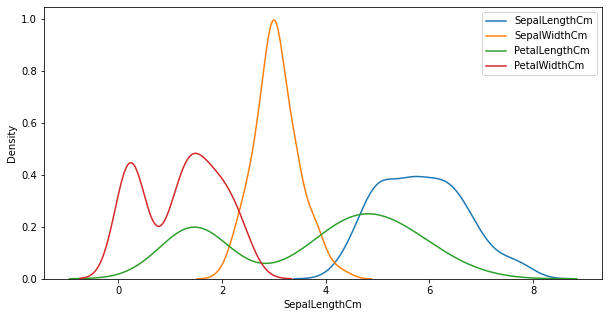

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['SepalLengthCm'], label='SepalLengthCm')
sns.kdeplot(df['SepalWidthCm'], label='SepalWidthCm')
sns.kdeplot(df['PetalLengthCm'], label='PetalLengthCm')
sns.kdeplot(df['PetalWidthCm'], label='PetalWidthCm')
plt.legend()
plt.show()

Podemos perceber que apenas a "SepalLengthCm" possui uma distribuição normal. Como o StandardScaler costuma ser mais indicado para variaveis com distribuição normal, podemos testar o MinMaxScaler na preparação dos dados.

# Preparando os dados para modelos de Aprendizado de Máquina

In [ ]:
df_preparado = df.copy()

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_preparado["Species"] = encoder.fit_transform(df_preparado["Species"])
df_preparado.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Transformando a coluna "Species" em números, pois o algoritmo trabalha melhor com números.

0 = Iris-setosa

1 = Iris-versicolor

2 = Iris-virginica

## MinMaxScaler

Conforme afirmado na visualização da distribuição dos dados a MinMaxScaler foi escolhido para a reescala. No entanto, devido a todos os dados possuirem a mesma unidade de medida(centímentros), espera-se que a reescala não altere tanto o desempenho do modelo.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

atributos = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

scaler = MinMaxScaler()
df_preparado[atributos] = scaler.fit_transform(df_preparado[atributos])

In [ ]:
df_preparado.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,0.428704,0.439167,0.467571,0.457778,1.000000
std,43.445368,0.230018,0.180664,0.299054,0.317984,0.819232
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,0.222222,0.333333,0.101695,0.083333,0.000000
50%,75.500000,0.416667,0.416667,0.567797,0.500000,1.000000
75%,112.750000,0.583333,0.541667,0.694915,0.708333,2.000000
max,150.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Podemos perceber que a transformação ocorreu de maneira correta.

# Insights

Com base na visualização e exploração dos dados chegamos as seguintes conclusões:

- Podemos observar que o 'SepalWidthCm' possui algums possíveis outliers. Mas devido a pouca quantidade de dados é muito arriscado treinar os modelos sem essas instâncias
- Atraves do box plot foi possível encontrar alguns possiveis outliers, mas não tratamos isso pois é um dataset pequeno e remover instâncias pode prejudicar o desempenho.
- As variáveis de entrada possui muito correlação entre si o que indica que pode ter variáveis explicando o mesmo fenômeno, o que faz sentido já que estamos tratando de largura e comprimento de petalas e sepalas. Além disso, caso o modelo não tenha um bom desempenho é valido testar removendo uma das variáveis que tem correlação acima de 90% para ver se não esta confundindo o modelo.
- Outro fator observado é que as variaveis de entrada possui uma correlação muito alta com a de saída, dessa forma um modelo simples de regressao linear pode conseguir lidar com o problema.
- Sobre a distribuição dos dados apenas a "SepalLengthCm" possui uma distribuição normal. Então vale a pena utilizar o MinMaxScaler e não o StandardScaler pois o segundo é mais indicado para variáveis com distribuição normal. Apesar disso, por todas as variáveis possuirem a mesma unidade de medida pode ser que a reescala nao altere tanto o resultado.
- Ainda, observa-se que para as petalas existe um crescimento linear para os tamanhos, sendo as setosas as menores, as versicolor medias e as virginicas maiores.
- Em relação as sepalas, observa-se que as setosas possuem maior comprimento e menor largura, enquanto as virginica e versicolor, possuem valores em um mesmo intervalo, não possuindo padrão bem estabelecido. 